###### Apply PCA on a high dimensional data set and visualize the results

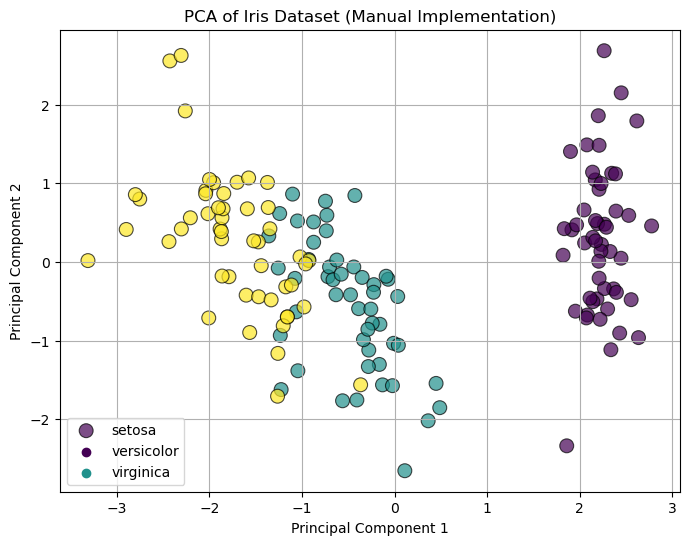

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_centered = (X - X_mean) / X_std

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1] #do argsort and take values in reverse order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices] #sort eigenvectors column wise

# Select the top 2 eigenvectors (for 2D visualization)
k = 2
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Transform the data
X_pca = np.dot(X_centered, top_k_eigenvectors)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', palette='viridis', data=pca_df, s=100, alpha=0.7, edgecolor='k')

# Add title and labels
plt.title('PCA of Iris Dataset (Manual Implementation)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(target_names)
plt.grid()

# Show the plot
plt.show()